#Итоговая работа по курсу "Аналитика больших данных"
##Астартов А.С.

Используем датасет MovieLens 100К:
https://grouplens.org/datasets/movielens/100k/

В данной части мы выступаем в роли bi-аналитика и хотим представить заказчику общую информацию по фильмам, пользователям, а так же построить top активных пользователей за последние 3 месяца для мотивации.


Построить гистограмму пользователей по возрасту

Построить 2 графика, показывающих распределение людей по профессиям в зависимости от их пола

https://docs.google.com/spreadsheets/d/1Fcm8k78k8eeY4bkRYWC3uTOe3d3SegpZqfTHISz-AZA/edit?usp=sharing

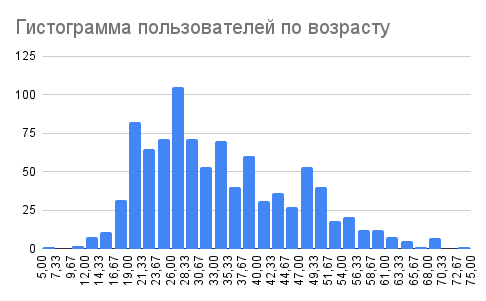

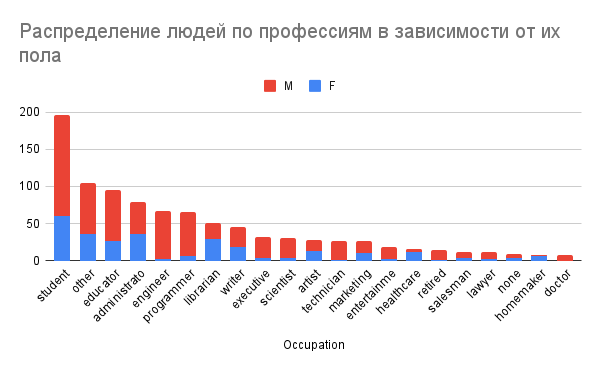

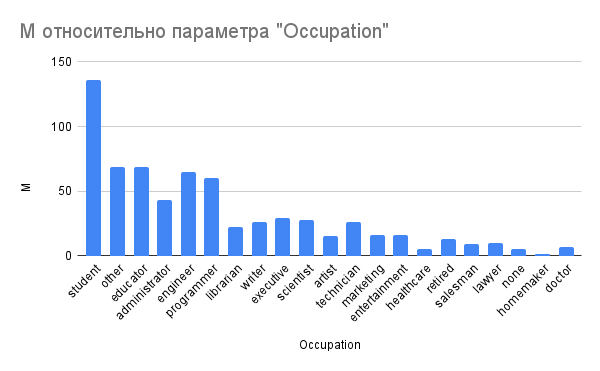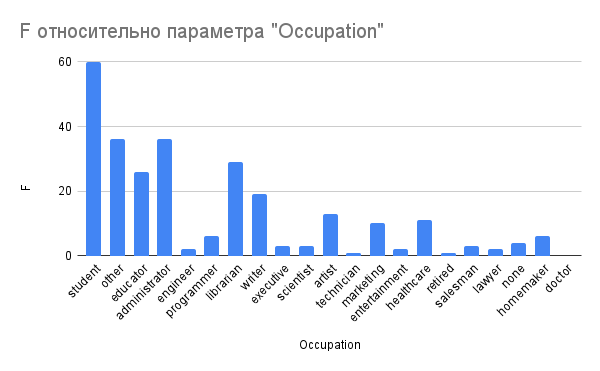

Построить график количества фильмов по жанрам

Построить график количества фильмов по годам

https://docs.google.com/spreadsheets/d/1XmxpsqMIsJzGWTM9Nmo9fJJPNj-yV0OIALsVGi1syJc/edit?usp=sharing

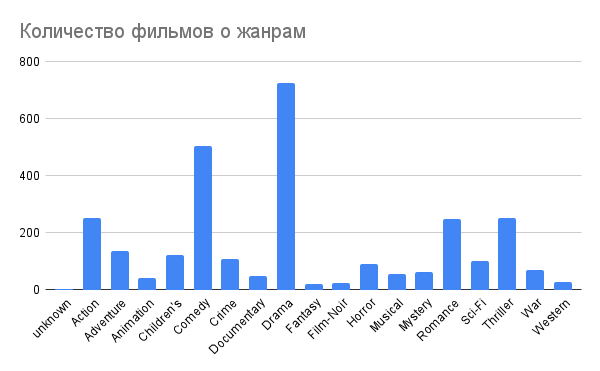

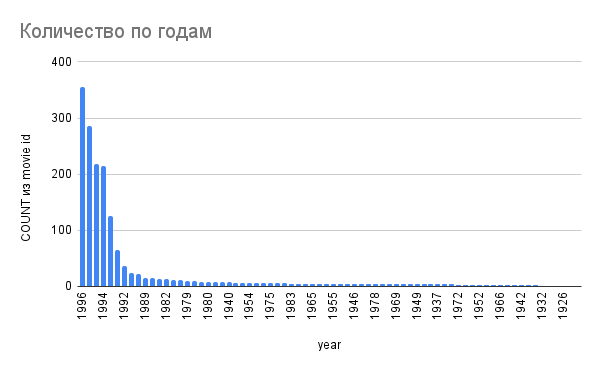

Построить график количества оценок по месяцам и годам

Выявить top-5 самых активных пользователей (больше всего оценок) за последние 3 месяца

https://docs.google.com/spreadsheets/d/1lWKHuiQ5q71zi3mbRzRGCaBdIQwWIqsRfHB4FCq2yxk/edit?usp=sharing




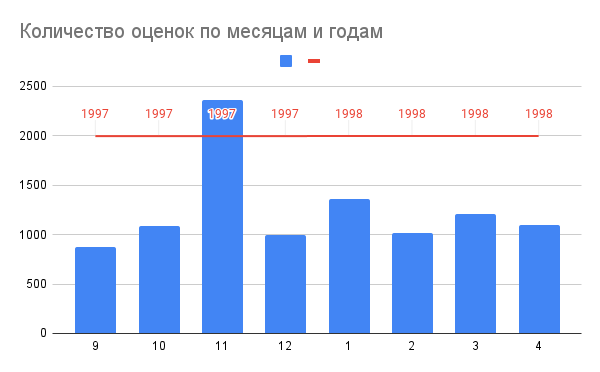

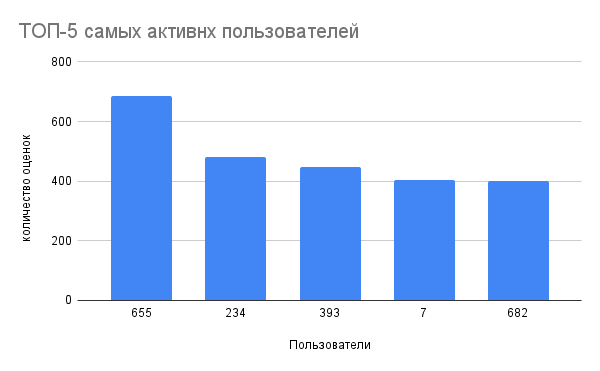

Загрузите в колаб файлы по оценкам (ratings) и фильмам (movies) и создайте на их основе pandas-датафреймы



In [ ]:
import pandas as pd

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip

--2023-05-16 19:14:33--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  28.5MB/s    in 0.2s    

2023-05-16 19:14:33 (28.5 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [ ]:
!unzip 'ml-100k.zip'

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [ ]:
mcols = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(' | ')
movies = pd.read_csv('ml-100k/u.item', sep = '|', names = mcols,  encoding='latin-1')

In [ ]:
rcols = "user id | item id | rating | timestamp".split(' | ')
ratings = pd.read_csv('ml-100k/u.data', sep = '\t', names = rcols,  encoding='latin-1')

In [ ]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок

In [ ]:
max_votes_id = ratings.groupby('user id').agg({'rating': 'count'}).sort_values('rating', ascending = False).reset_index()['user id'][0]
max_votes_id

405

Оставьте в датафрейме ratings только те фильмы, который оценил данный пользователь 



In [ ]:
ratings_user = ratings[ratings['user id'] == max_votes_id]
ratings_user.head()

,user id,item id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447


Добавьте к датафрейму из задания 3 столбцы:
По жанрам. Каждый столбец - это жанр. Единицу записываем, если фильм принадлежит данному жанру и 0 - если нет

столбцы с общим количеством оценок от всех пользователей на фильм и суммарной оценкой от всех пользователей


In [ ]:
features = ratings_user.merge(movies, left_on = 'item id', right_on = 'movie id', how = 'inner')

In [ ]:
features = features.drop(['user id', 'timestamp', 'movie title', 'movie id', 'video release date', 'IMDb URL',  'unknown'], axis = 1)

In [ ]:
features['release date'] = pd.to_datetime(features['release date'] ).dt.year

In [ ]:
features.head()

,item id,rating,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,56,4,1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,592,1,1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1582,1,1947,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,171,1,1991,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,580,1,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
totals = ratings.groupby('item id').agg({'timestamp':'count', 'rating': 'sum'}).reset_index().rename(columns = {'timestamp':'count_rating', 'rating':'sum_rating'})
totals

,item id,count_rating,sum_rating
0,1,452,1753
1,2,131,420
2,3,90,273
3,4,209,742
4,5,86,284
...,...,...,...
1677,1678,1,1
1678,1679,1,3
1679,1680,1,2
1680,1681,1,3


In [ ]:
features = features.merge(totals, on = 'item id', how = 'inner')

In [ ]:
features.columns

Index(['item id', 'rating', 'release date', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'count_rating', 'sum_rating'],
      dtype='object')

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   item id       737 non-null    int64
 1   rating        737 non-null    int64
 2   release date  737 non-null    int64
 3   Action        737 non-null    int64
 4   Adventure     737 non-null    int64
 5   Animation     737 non-null    int64
 6   Children's    737 non-null    int64
 7   Comedy        737 non-null    int64
 8   Crime         737 non-null    int64
 9   Documentary   737 non-null    int64
 10  Drama         737 non-null    int64
 11  Fantasy       737 non-null    int64
 12  Film-Noir     737 non-null    int64
 13  Horror        737 non-null    int64
 14  Musical       737 non-null    int64
 15  Mystery       737 non-null    int64
 16  Romance       737 non-null    int64
 17  Sci-Fi        737 non-null    int64
 18  Thriller      737 non-null    int64
 19  War           737 non-null   

Сформируйте X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

In [ ]:
X = features.iloc[:, 2:]
y = features['rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

Возьмите модель линейной регрессии (или любую другую для задачи регрессии)  и обучите ее на фильмах



In [ ]:
lrmodel = LogisticRegression(max_iter=10000)
lrmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Оцените качество модели на X_test, y_test при помощи метрик для задачи регрессии



In [ ]:
y_pred = lrmodel.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6216216216216216

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
trmodel = DecisionTreeClassifier()
gs = GridSearchCV(estimator = trmodel, param_grid = {'max_depth': np.arange(1,30) }, cv = 5, scoring = 'accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [ ]:
y_pred_2 = gs.best_estimator_.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_2)

0.6283783783783784

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_3 = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_3)

0.6013513513513513

In [ ]:
f1_score(y_test, y_pred_3, average = 'macro')

0.2780028543805534

In [ ]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_4 = linmodel.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_4)

1.6993063564774662

Загрузить данные в spark


In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2,228 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,342 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.4.0-bin-hadoop3.tgz

spark-3.4.0-bin-hadoop3/
spark-3.4.0-bin-hadoop3/data/
spark-3.4.0-bin-hadoop3/data/streaming/
spark-3.4.0-bin-hadoop3/data/streaming/AFINN-111.txt
spark-3.4.0-bin-hadoop3/data/graphx/
spark-3.4.0-bin-hadoop3/data/graphx/followers.txt
spark-3.4.0-bin-hadoop3/data/graphx/users.txt
spark-3.4.0-bin-hadoop3/data/mllib/
spark-3.4.0-bin-hadoop3/data/mllib/als/
spark-3.4.0-bin-hadoop3/data/mllib/als/test.data
spark-3.4.0-bin-hadoop3/data/mllib/als/sample_movielens_ratings.txt
spark-3.4.0-bin-hadoop3/data/mllib/gmm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_libsvm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_svm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_fpgrowth.txt
spark-3.4.0-bin-hadoop3/data/mllib/kmeans_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/pic_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/streaming_kmeans_data_test.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_linear_regression_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/ridge-data/
spark-3.4.0-bin-hadoop3/data/

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
smovies = spark.createDataFrame(movies)
sratings = spark.createDataFrame(ratings)

In [ ]:
smovies.show()

+--------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|movie id|         movie title|release date|video release date|            IMDb URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+--------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|       1|    Toy Story (1995)| 01-Jan-1995|               NaN|http://us.imdb.co...|      0|     0|        0|        1|         1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|       2|    GoldenEye (1995)| 01-Jan-1995|

In [ ]:
sratings.show()

+-------+-------+------+---------+
|user id|item id|rating|timestamp|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
|     22|    377|     1|878887116|
|    244|     51|     2|880606923|
|    166|    346|     1|886397596|
|    298|    474|     4|884182806|
|    115|    265|     2|881171488|
|    253|    465|     5|891628467|
|    305|    451|     3|886324817|
|      6|     86|     3|883603013|
|     62|    257|     2|879372434|
|    286|   1014|     5|879781125|
|    200|    222|     5|876042340|
|    210|     40|     3|891035994|
|    224|     29|     3|888104457|
|    303|    785|     3|879485318|
|    122|    387|     5|879270459|
|    194|    274|     2|879539794|
|    291|   1042|     4|874834944|
|    234|   1184|     2|892079237|
+-------+-------+------+---------+
only showing top 20 rows



In [ ]:
mr = smovies.join(sratings, smovies['movie id']==sratings['item id'], how = 'inner')

Средствами спарка вывести среднюю оценку для каждого фильма



In [ ]:
from pyspark.sql.functions import desc,asc

In [ ]:
avr_rating = mr.groupBy('item id', 'movie title').avg('rating').sort(desc('avg(rating)'))
avr_rating.show()

+-------+--------------------+-----------------+
|item id|         movie title|      avg(rating)|
+-------+--------------------+-----------------+
|   1189|  Prefontaine (1997)|              5.0|
|   1599|Someone Else's Am...|              5.0|
|    814|Great Day in Harl...|              5.0|
|   1536|Aiqing wansui (1994)|              5.0|
|   1653|Entertaining Ange...|              5.0|
|   1500|Santa with Muscle...|              5.0|
|   1293|     Star Kid (1997)|              5.0|
|   1122|They Made Me a Cr...|              5.0|
|   1201|Marlene Dietrich:...|              5.0|
|   1467|Saint of Fort Was...|              5.0|
|   1449|Pather Panchali (...|            4.625|
|    119|Maya Lin: A Stron...|              4.5|
|   1642|Some Mother's Son...|              4.5|
|   1398|         Anna (1996)|              4.5|
|   1594|      Everest (1998)|              4.5|
|    408|Close Shave, A (1...|4.491071428571429|
|    318|Schindler's List ...|4.466442953020135|
|    169|Wrong Trous

Посчитайте средствами спарка среднюю оценку для каждого жанра

In [ ]:
mr = mr.withColumnRenamed("Children's", "Childrens")


In [ ]:

mr = mr.withColumnRenamed("Film-Noir", "FilmNoir")


['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'FilmNoir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [ ]:

mr = mr.withColumnRenamed("Sci-Fi", "SciFi")

genre_names = mr.columns[5:24]
genre_names

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'FilmNoir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'SciFi',
 'Thriller',
 'War',
 'Western']

In [ ]:
st = "stack(19, "
for name in genre_names:
  st += f'"{name}", {name}, '
st= st[:-2]+ ") as (Genre, Fl)"
st

'stack(19, "unknown", unknown, "Action", Action, "Adventure", Adventure, "Animation", Animation, "Childrens", Childrens, "Comedy", Comedy, "Crime", Crime, "Documentary", Documentary, "Drama", Drama, "Fantasy", Fantasy, "FilmNoir", FilmNoir, "Horror", Horror, "Musical", Musical, "Mystery", Mystery, "Romance", Romance, "SciFi", SciFi, "Thriller", Thriller, "War", War, "Western", Western) as (Genre, Fl)'

In [ ]:
genre_df = mr.selectExpr('rating', st).where('Fl!=0').groupBy('Genre').agg({'rating':'avg'})
genre_df.show()

+-----------+------------------+
|      Genre|       avg(rating)|
+-----------+------------------+
|      Crime|3.6322780881440098|
|    Romance| 3.621704948358255|
|   Thriller|3.5090069495245064|
|  Adventure| 3.503526503308369|
|    unknown|               3.2|
|      Drama|3.6873793708484772|
|        War| 3.815811874866993|
|Documentary|3.6728232189973613|
|    Fantasy|3.2152366863905324|
|   FilmNoir|3.9215233698788228|
|    Mystery|  3.63813155386082|
|    Musical| 3.521396851029471|
|  Animation|3.5766990291262135|
|     Horror|3.2903893172841827|
|    Western|3.6132686084142396|
|     Comedy|3.3940734781442745|
|     Action| 3.480245417953027|
|      SciFi|3.5607227022780834|
|  Childrens|3.3532442216652742|
+-----------+------------------+



В спарке получить 2 датафрейма с 5-ю самыми популярными и самыми непопулярными фильмами (по количеству оценок, либо по самой оценке - на Ваш выбор)



In [ ]:
mr.groupBy('movie id').agg({'rating':'count'}).sort(desc('count(rating)')).show(5)

+--------+-------------+
|movie id|count(rating)|
+--------+-------------+
|      50|          583|
|     258|          509|
|     100|          508|
|     181|          507|
|     294|          485|
+--------+-------------+
only showing top 5 rows



In [ ]:
mr.groupBy('movie id').agg({'rating':'count'}).sort(asc('count(rating)')).show(5)

+--------+-------------+
|movie id|count(rating)|
+--------+-------------+
|    1526|            1|
|    1343|            1|
|    1505|            1|
|    1447|            1|
|     677|            1|
+--------+-------------+
only showing top 5 rows



# Теоретическая часть

Вы - главный по данным в среднем по объему просмотров интернет-кинотеатре. Ваша задача разработать стратегию внедрения хранилища данных и работы с большими данными в этой компании. Задания:


**Описать основные бизнес-отчеты (2-3 штуки), которые мы хотим видеть по нашему бизнесу**

Отчёт по пользователям. Распределение пользователей по возрасту и по профессии в зависимости от пола, самые активные пользователи за последние 3 месяца. Основные графики.

Отчёт по фильмам. Количество фильмов по жанрам и по годам. Средние рейтинги по фильмам и по жанрам, наиболее и наименее популярные фильмы по рейтингам и по количеству откликов.

Отчет по продажам. Статистики просмотров, конверсия переходов и подписок.


**Описать основные имеющиеся данные и источники их поступления**

Статистические источники: данные с сайта, опросов и отзывов

Внутренние истоники: бд фильмы-пользователи, бухгалтерские отчёты  отчёты отдела продаж, данные продаж с сайта.

Внешние источники: анализ рынка, сбор данных с сайтов-конкурентов и международных аггрегаторов и api.

**Описать основные сущности в хранилище данных (схема звезда) и процесс заливки данных**

В центре - таблица продаж с идентификаторами фильма, пользователя, платежа и даты - таблица фактов. Таблица с фильмами : год выпуска, жанры, описание, режиссерский и актерский состав. Таблица пользователей: возраст,пол, профессия, адресс, мэйл. Таблица платежей: идентификатор фильм-стоимость, сумма платежа, категория (аренда, покупка и пр). Дополнительные таблицы: рейтинги (связка пользователи-фильмыы), стоимость фильмов (платежи-фильмы) .
Данные обновляются при каждой покупке с сайта и заполнении пользователями форм. 
Обновление базы фильмов - сотрудниками, отвечающими за хранилище

**Описать основные проверки на качество данных (10 штук), которыми будем пользоваться при заливке**

1) id в каждом из справочников - целое уникальное положительное число

2) e-mail - валидный и уникальный

3) дата продажи не больше чем текущая.

4) проверки пустых строк и пропусков, заполнение или игнорирование

5) контроль текущей базы: устранение дубликатов, корректные даты

6) контроль типов данных

7) пол - выбор из списка

8) адрес - списка

9) валидация возраста

10) контроль стоимости (ограничения в таблице в соответствии с ценовой политикой)

**Придумать Data-проект, который должен улучшить показатели Вашего бизнеса и расписать его по Crisp-DM**

1 - Business Understanding
Увеличение продаж и конверсии. 
Внедрение рекомендательной модели должно существенно повлиять на основные метрики. Рекоомендуется проведение А/Б тестирования.
Определение рисков. Может ли модель повлиять негативно и уменьшить продажи.
Анализ затрат и выгод. План проекта.

2 - Data Understanding
Собрать и описать данные, изучить качество. Рассчитать базовые статистики, сформулировать гипотезы, определить размеры источников данных и как с ними можно работать. Определить этапы подготовки данных.

3 - Data Preparation
Выбор - очистка - обогащение - сохранение

4 - Modeling
Выбор модели - Разделение данных - обучение - Получение результатов для контрольной группы - оценка

5 - (Evaluation)
Оценить результаты - просмотреть процесс (ошибки. альтернативы) - следующие шаги (доработка, внедрение)

6 - (Deployment)

Планирование внедрения, описание всех проблем и план на случай непредвиденных обстотельств.
Планирование мониторинга и тех.обслуживания. какие модели требуют поддержжки, проверка актуальности. 
Ревью проекта.

**Описать требуемые роли в команде по работе с данными на этапах 4 и 5**

In [ ]:
Этап 4 - Моделирование - требуется Data Scientist с ключевыми навыками в машинном обучении.
Этап 5 - Оценка решения - должны проводить аналитик совместно с владельцем.